In [11]:
import yfinance as yf

# Create ticker object for Tesla
tesla_ticker = yf.Ticker("TSLA")

# Extract historical stock data for Tesla
tesla_data = tesla_ticker.history(period="max")

# Reset index and display First five rows
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# Download webpage containing Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
# Parse HTML content
soup = BeautifulSoup(response.text, "html.parser")
# Extract table with Tesla revenue data
table = soup.find("table")
# Convert table to DataFrame
tesla_revenue = pd.read_html(str(table))[0]
# Rename columns
tesla_revenue.columns = ["Date", "Revenue"]
# Remove commas and dollar signs from revenue column
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({",": "", "\$": ""}, regex=True)
# Remove null or empty values
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
# Display last five rows
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [13]:
# Create ticker object for GameStop
gme_ticker = yf.Ticker("GME")

# Extract historical stock data for GameStop
gme_data = gme_ticker.history(period="max")

# Reset index and display first five rows
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [4]:
# Download webpage containing GameStop revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
# Parse HTML content
soup = BeautifulSoup(response.text, "html.parser")
# Extract table with GameStop revenue data
table = soup.find("table")
# Convert table to DataFrame
gme_revenue = pd.read_html(str(table))[0]
# Rename columns
gme_revenue.columns = ["Date", "Revenue"]

# Remove commas and dollar signs from revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({",": "", "\$": ""}, regex=True)
# Remove null or empty values
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
# Display last five rows
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


In [5]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

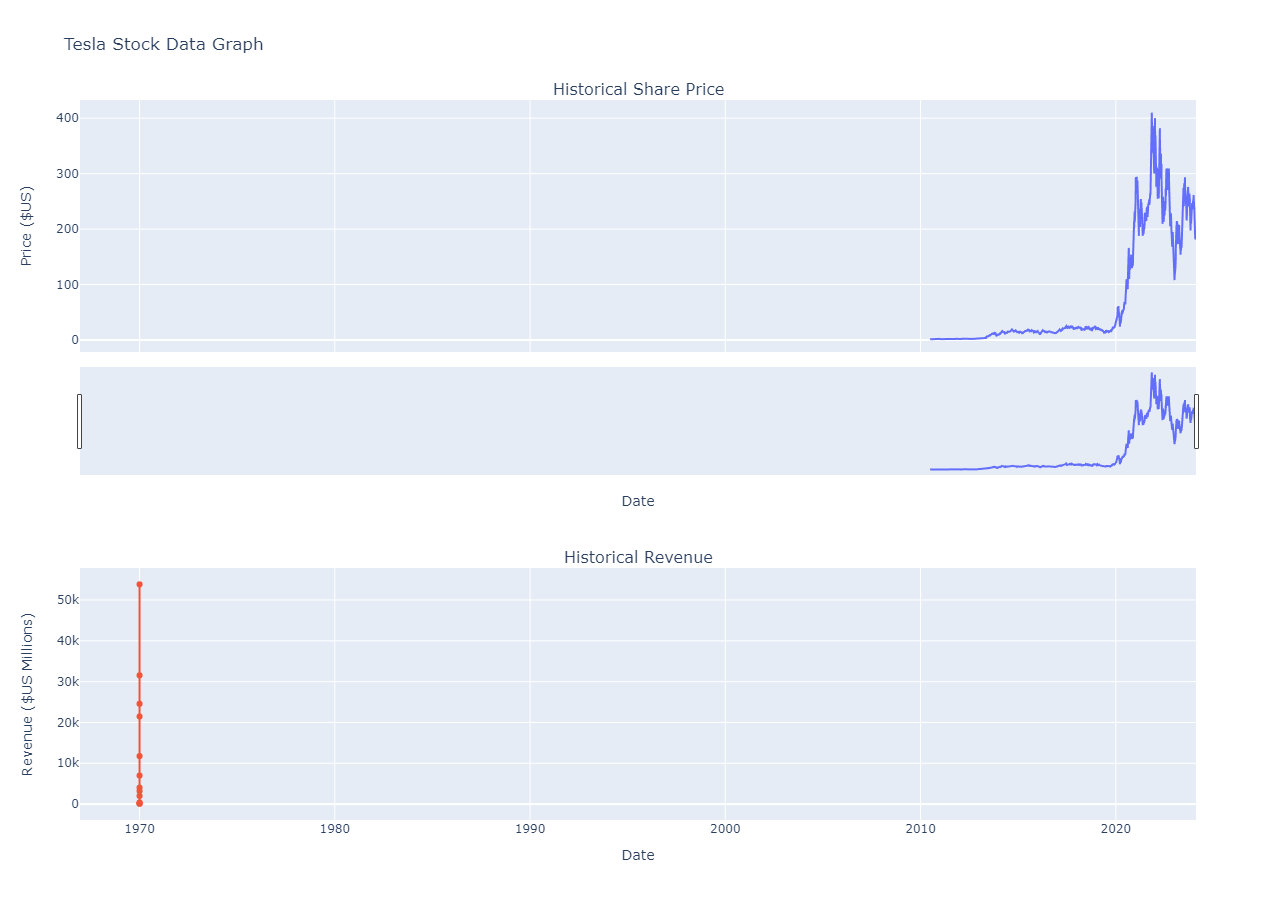

In [8]:
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data Graph')

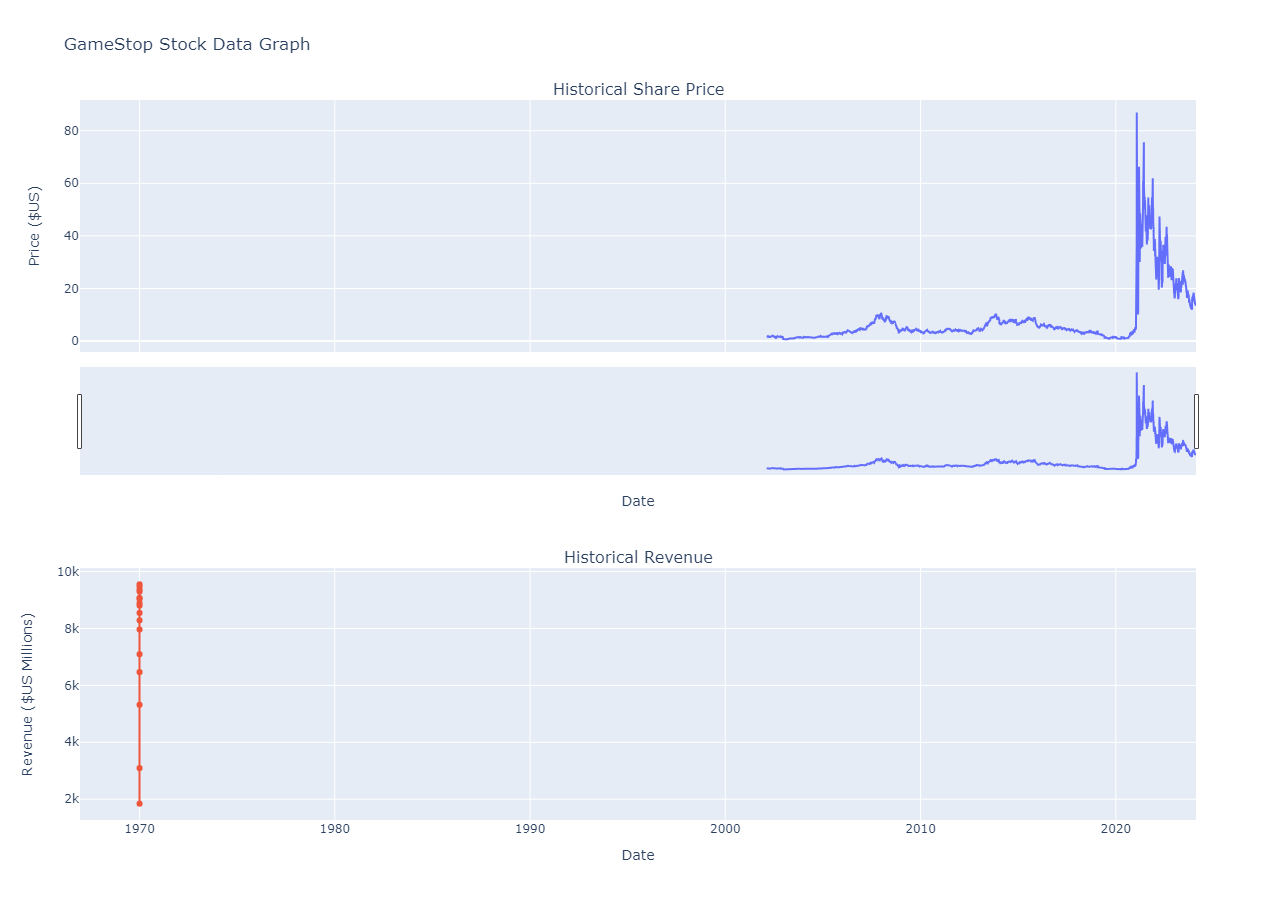

In [9]:
make_graph(gme_data, gme_revenue, 'GameStop Stock Data Graph')